In [1]:
import os
import sys

os.environ["CUDA_VISIBLE_DEVICES"] = "0"
 
if os.path.abspath(os.path.join(os.getcwd(), "../../")) not in sys.path:
    sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../../")))
    
from plan_generator.src.config import Configuration
from plan_generator.src.models import PlanGenerator
from plan_generator.src.data import PlanDataset
from plan_generator.src.trainer import PlanGeneratorTrainer

CUDA status
  torch.cuda.is_available(): True
  DEVICE: cuda 

Seeds status:
  Seeds set for torch        : 777
  Seeds set for torch on GPU : 777
  Seeds set for numpy        : 777
  Seeds set for random       : 777 



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataset.py:444: UserWarning: Length of split at index 1 is 0. This might result in an empty dataset.
  warnings.warn(f"Length of split at index {i} is 0. "
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataset.py:444: UserWarning: Length of split at index 2 is 0. This might result in an empty dataset.
  warnings.warn(f"Length of split at index {i} is 0. "
/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



                train_loader_subset_index: 0/0
                validation_loader_subset_index: 0/0
                


training...: 100%|██████████| 5049/5049 [34:09<00:00,  2.46it/s]



                    wall_generator_loss_avg_train: 0.005444551037543687
                    room_allocator_loss_avg_train: 0.017724969889876405
                    wall_generator_loss_avg_validation: inf
                    room_allocator_loss_avg_validation: inf
                    


RuntimeError: The expanded size of the tensor (256) must match the existing size (0) at non-singleton dimension 3.  Target sizes: [0, 1, 256, 256].  Tensor sizes: [0]

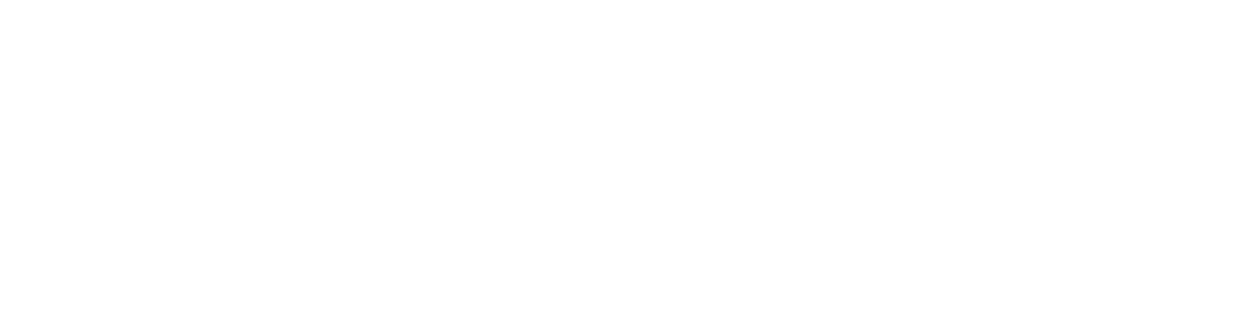

In [2]:
configuration = Configuration()

configuration.TRAIN_SIZE = 1.0
configuration.VALIDATION_SIZE = 0.0
configuration.TEST_SIZE = 0.0

plan_dataset = PlanDataset(configuration=configuration, use_transform=False)
plan_generator = PlanGenerator(configuration=configuration)

plan_generator_trainer = PlanGeneratorTrainer(
    configuration=configuration,
    plan_generator=plan_generator,
    plan_dataset=plan_dataset,
    validating=False,
)

plan_generator_trainer.fit()